In [3]:

# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline




In [7]:
# Use to grab data from the web(HTTP capabilities)
import requests

# We'll also use StringIO to work with the csv file, the DataFrame will require a .read() method
from io import StringIO

In [8]:
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

In [13]:
source = requests.get(url).text

In [14]:
poll_data = StringIO(source)

In [17]:
poll_df = pd.read_csv(poll_data)

In [20]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 78.0+ KB


In [43]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [31]:
tmp = poll_df['Affiliation'].value_counts()

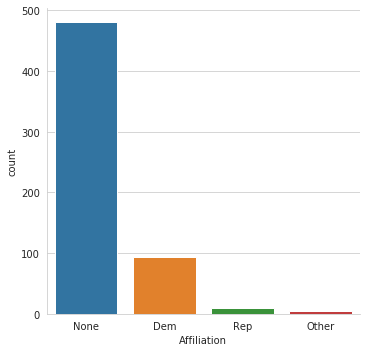

In [37]:
sns.catplot('Affiliation', data=poll_df, kind = 'count', order = tmp.index)

In [38]:
#,order=['Other','Rep','Dem','None']

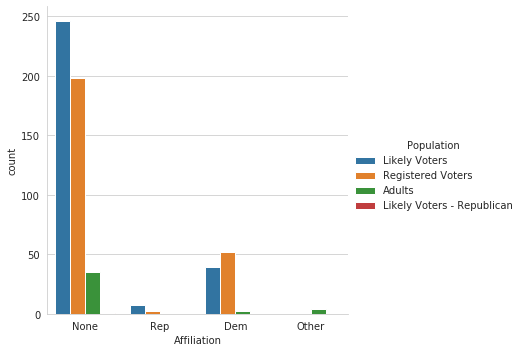

In [57]:
sns.catplot('Affiliation', data=poll_df, kind = 'count',hue = 'Population')

In [84]:
avg = pd.DataFrame(poll_df.mean()).loc[['Obama','Romney','Undecided']]

In [85]:
avg

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827


In [86]:
std = pd.DataFrame(poll_df.std()).loc[['Obama','Romney','Undecided']]

In [87]:
std

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754


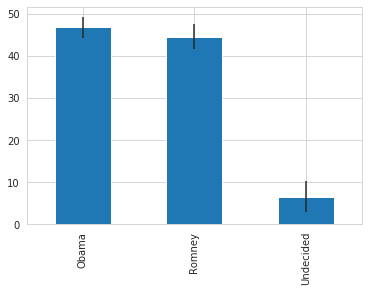

In [89]:
avg.plot(yerr=std,kind='bar',legend=False)

In [92]:
poll_avg = pd.concat([avg,std],axis = 1)

In [94]:
poll_avg.columns = ['Average','STD']

In [95]:
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


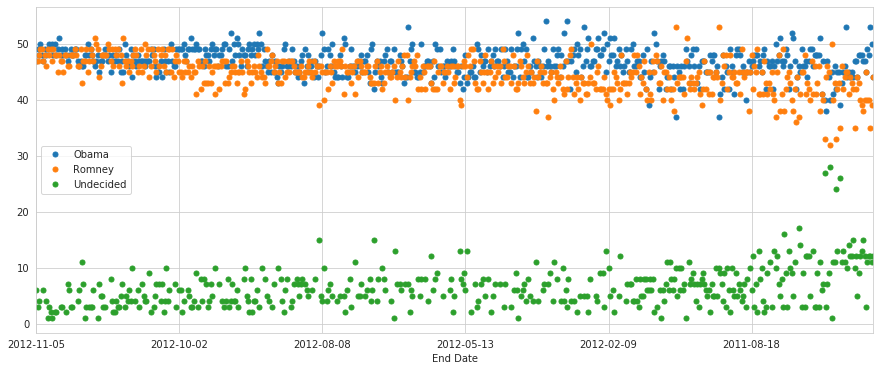

In [104]:
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],marker='o',markersize = 5,linestyle='',figsize = (15,6))

In [105]:
from datetime import datetime

In [109]:
poll_df['vote_diff'] = (poll_df.Obama - poll_df.Romney)/100

In [110]:
test = poll_df.groupby('Start Date')